# Imbalanced Data

In [1]:
# We'll start by importing the usual suspects
import pandas as pd #for data manipulation
import numpy as np #for numerical computations
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns # his will run on top of matplotlib to give us some visulalizations
#Let's use this magic line so that we can see the visualizations within the Notebook
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# loading in the dataset as a data frame
df = pd.read_csv("default-rate.csv", index_col=0)

In [3]:
# check the first records of the dataset
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


In [4]:
# Get a glimpse of the dataset
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


Our dataset has 10000 records and four columns. The median balance is 823.6 and the maximum is 2654.32. The Median income is 34552.64 while the maximum is 73554.23. 

In [5]:
# Get some more info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


We can clearly see that our dataset has no null values, otherwise we'd have to deal with them first. 

## Visualizing the default classes

In [0]:
defaulters = df.groupby('default').count().reset_index()


In [7]:
defaulters

,default,student,balance,income
0,No,9667,9667,9667
1,Yes,333,333,333


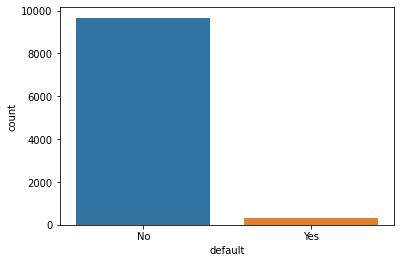

In [8]:
sns.countplot(df["default"])

From the above visualization we can see that most the data points in the daatset fall NO default class

#### Visualization of Students

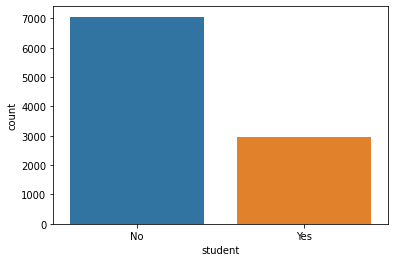

In [9]:
sns.countplot(df['student'])

We see that most of the datapoints are not students

Next, we can Seaborn's pairplot to get a quick visualization of the dataset. 

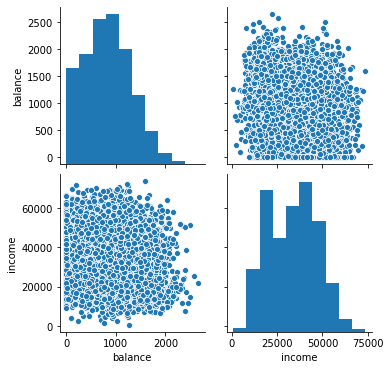

In [10]:
sns.pairplot(df)

### Distribution of the data

let's check the distribution of the data using histogram and boxplots

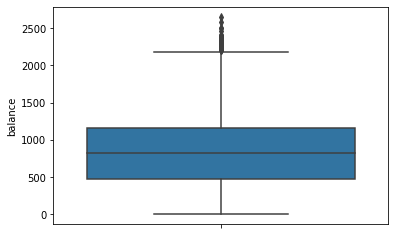

In [11]:
sns.boxplot(y=df["balance"])


In [0]:
q1, q3= np.percentile(df['income'],[25,75])

In [0]:
q_1, q_3= np.percentile(df['balance'],[25,75])

In [14]:
q1, q3

(21340.462905, 43807.729275)

In [0]:
iqr1 = q3 - q1

In [16]:
iqr1

22467.266369999998

In [17]:
q_1, q_3

(481.73110505, 1166.30838675)

In [0]:
qr2 = q_3 - q_1

In [19]:
qr2

684.5772817

In [0]:
lower_bound = q1 - (1.5 * q1)
upper_bound = q3 + (1.5 * q3)

In [21]:
lower_bound, upper_bound

(-10670.2314525, 109519.3231875)

In [0]:
lower_bound_1 = q_1 - (1.5 * q_1)
upper_bound_1 = q_3 + (1.5 * q_3)

In [23]:
lower_bound_1, upper_bound_1

(-240.865552525, 2915.770966875)

In [24]:
df[df['balance'] > 2915.7709668749999]

,default,student,balance,income


In [25]:
df['balance'].max()

2654.322576

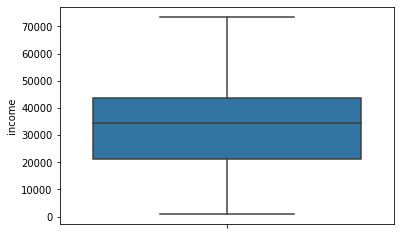

In [26]:
sns.boxplot(y=df["income"])


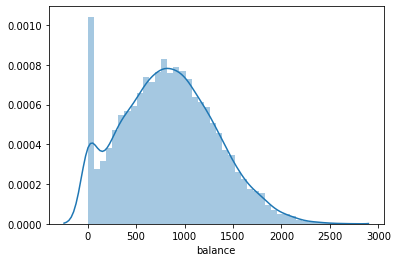

In [27]:
sns.distplot(df["balance"])


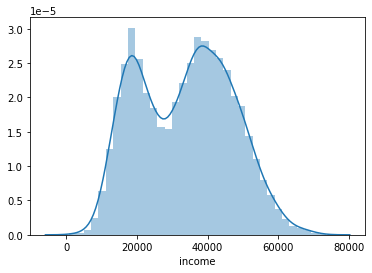

In [28]:
sns.distplot(df["income"])


#### What's the balance for the two classes ?

In [29]:
pd.set_option('float_format', '{:f}'.format) # in order to see the full figure instead of e raised to 
default = df.groupby(['default','student'])['balance'].sum().reset_index() # Group by student and sum the balance and reset the index
default.columns = ['Default','student','Balance'] # define the columns for the new data frame
default = default.sort_values(by='Balance',ascending=False) # sort by values and arrange from the largest
default

,Default,student,Balance
0,No,No,5099855.481650
1,No,Yes,2671868.751861
2,Yes,No,345756.477949
3,Yes,Yes,236268.144690


In [30]:
df.groupby('default')['balance'].sum().reset_index()

,default,balance
0,No,7771724.233510
1,Yes,582024.622639


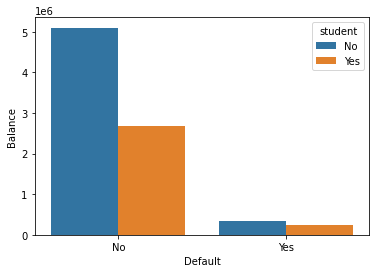

In [31]:
sns.barplot(data=default, x='Default', y='Balance',hue='student')

We see that the total balance the people who haven't defaulted is 7771724 and for those who have defaulted is 582024. We also see that most of the people who haven't defaulted and have a high balance are **No**t students

#### What's the income for the two classes ?

In [32]:
pd.set_option('float_format', '{:f}'.format) # in order to see the full figure instead of e raised to 
default_income = df.groupby(['default','student'])['income'].sum().reset_index() # Group by student and sum the balance and reset the index
default_income.columns = ['Default','Student','Income'] # define the columns for the new data frame
default_income = default_income.sort_values(by='Income',ascending=False) # sort by values and arrange from the largest
default_income

,Default,Student,Income
0,No,No,273955578.919496
1,No,Yes,50528553.847708
2,Yes,No,8368760.438320
3,Yes,Yes,2316925.554049


In [33]:
df.groupby('default')['income'].sum().reset_index()

,default,income
0,No,324484132.767204
1,Yes,10685685.992369


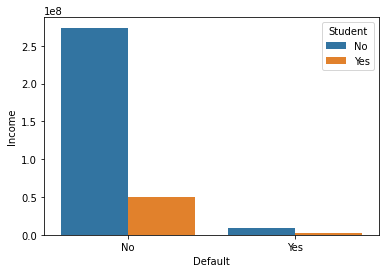

In [34]:
sns.barplot(data=default_income, x='Default', y='Income', hue='Student')

The total income for the people who have defaulted is 324484132 and for 10685686 for those who haven't defaulted.Most of those who have the highest income and haven't defaulted are **No**t student.

#### Who has the highest amount of balance. Is it students or non-students?

In [35]:
pd.set_option('float_format', '{:f}'.format) # in order to see the full figure instead of e raised to 
loan_amount = df.groupby('student')['balance'].sum().reset_index() # Group by student and sum the balance and reset the index
loan_amount.columns = ['Student','Balance'] # define the columns for the new data frame
loan_amount = loan_amount.sort_values(by='Balance',ascending=False) # sort by values and arrange from the largest
loan_amount

,Student,Balance
0,No,5445611.959599
1,Yes,2908136.896551


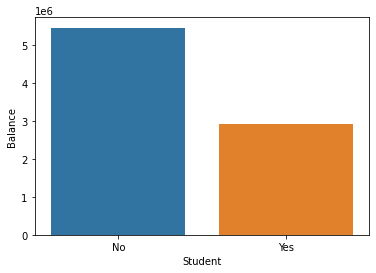

In [36]:
sns.barplot(data=loan_amount, x='Student', y='Balance')

Surprisingly the people with the most balance are not students.

#### Who has the highest amount of income. Is it students or non-students?

Let's now perform a similar operation on the income

In [37]:
pd.set_option('float_format', '{:f}'.format) # in order to see the full figure instead of e raised to 
income_amount = df.groupby('student')['income'].sum().reset_index() # Group by student and sum the income and reset the index
income_amount.columns = ['Student','Income'] # define the columns for the new data frame
income_amount = income_amount.sort_values(by='Income',ascending=False) # sort by values and arrange from the largest
income_amount

,Student,Income
0,No,282324339.357816
1,Yes,52845479.401757


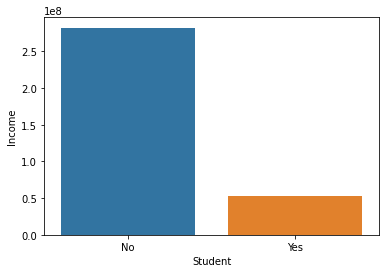

In [38]:
sns.barplot(data=income_amount, x='Student', y='Income')

The people with the most income are not students yet they are the people with the most balance.This could be because the people with most income also have the biggest borrowing muscle because they are more credit worth. 

#### Relationship between the income and balance.

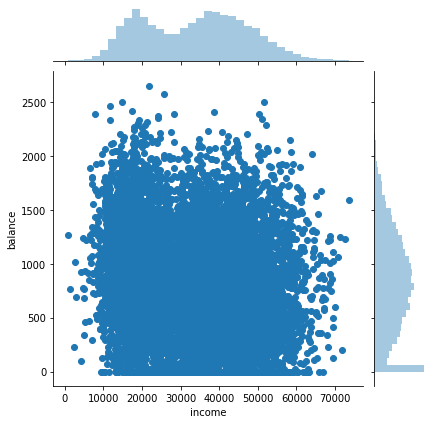

In [39]:
sns.jointplot(data = df, x = df['income'], y = df['balance'])

In [40]:
df['income'].corr(df['balance'])

-0.1522434005865672

In [41]:
import scipy.stats  as stats
stats.pearsonr(df['income'], df['balance'])

(-0.15224340058656724, 6.380440176588157e-53)

We can see that there is a negative correlation of about 15% between the income and the balance. This means that as income increases the balance decreases. The 2-tailed p-value being less that 0.05 also suggest the same thing.

### Average Income of Defaulters and Non defaulters

In [42]:
average_income = df.groupby('default')['income'].mean().reset_index() # Group by student and sum the income and reset the index
average_income.columns = ['Default','Mean'] # define the columns for the new data frame
average_income = average_income.sort_values(by='Mean',ascending=False) # sort by values and arrange from the largest
average_income

,Default,Mean
0,No,33566.166625
1,Yes,32089.147124


### Relationship Between Defaulting and Being a Student

H0:There is no statistically significant relationship between defaulting and being a student.

H1:There is a statistically significant relationship between defaulting and being a student.

In [43]:
contingency_table = pd.crosstab(
    df['default'],
    df['student'],
    margins = True
)
contingency_table

student,No,Yes,All
default,,,
No,6850,2817,9667
Yes,206,127,333
All,7056,2944,10000


In [0]:
from scipy.stats import chi2_contingency

In [45]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,contingency_table.iloc[1][0:2].values])
f_obs

array([[6850, 2817],
       [ 206,  127]])

In [0]:
chi2, p, dof, ex = chi2_contingency(f_obs)

In [47]:
chi2, p

(12.1166885136231, 0.0004997256756210486)

Our p-value < 00.05 we therefore reject the null hypothesis and conclude that there is an relationship between the default rate and being a student.

###  Income of both defaulters and non defaulters are the same
Ho The mean income of defaulters are  are equal.

H1 The mean income of defaulters are  not are equal.


In [0]:
from scipy.stats import ttest_ind

In [0]:
defaulters = df[df['default'] == 'Yes']['income']

In [0]:
non_defaulters = df[df['default'] == 'No']['income']

In [51]:
df[df['default'] == 'Yes']

,default,student,balance,income
137,Yes,Yes,1486.998122,17854.397030
174,Yes,Yes,2205.799521,14271.492250
202,Yes,Yes,1774.694223,20359.506090
207,Yes,No,1889.599190,48956.171590
210,Yes,Yes,1899.390626,20655.200000
...,...,...,...,...
9913,Yes,No,2148.898454,44309.917170
9922,Yes,Yes,1627.898323,17546.997020
9950,Yes,No,1750.253150,51578.940160
9952,Yes,No,1515.606239,48688.512090


In [52]:
ttest_ind(defaulters,non_defaulters)

Ttest_indResult(statistic=-1.987338454885802, pvalue=0.046912142143412355)

Since our p value < 0.05 we reject the null hypothesis and conclude that the mean of the defaulters and non-defaulters are not equal.

## Feature Engineering

I would like to see the ratio of the balance and the income.

In [0]:
def divide(x):
    balance,income = x[0],x[1]
    if balance != 0:
        return (income / balance)
    return 0


In [0]:
df['bal_income_ratio'] = df[['balance','income']].apply(divide,axis=1)

In [55]:
df.head()

,default,student,balance,income,bal_income_ratio
1,No,No,729.526495,44361.625070,60.808792
2,No,Yes,817.180407,12106.134700,14.814519
3,No,No,1073.549164,31767.138950,29.590763
4,No,No,529.250605,35704.493940,67.462358
5,No,No,785.655883,38463.495880,48.957179


## Develop a model to predict the probability of defaulting.


We'll start by importing train_test_split that we'll use to split our dataset into a training and test set

In [0]:
from sklearn.model_selection import train_test_split

Next, we convert the default and student column into dummy variables because our model will only take numerical figures. We also drop the first dummy variable so that we don't fall into the dummy variable trap

In [0]:
feats = ['default','student']

In [0]:
df_final = pd.get_dummies(df,columns=feats,drop_first=True)

In [59]:
df_final.head()

,balance,income,bal_income_ratio,default_Yes,student_Yes
1,729.526495,44361.625070,60.808792,0,0
2,817.180407,12106.134700,14.814519,0,1
3,1073.549164,31767.138950,29.590763,0,0
4,529.250605,35704.493940,67.462358,0,0
5,785.655883,38463.495880,48.957179,0,0


In [60]:
df_final.describe()

,balance,income,bal_income_ratio,default_Yes,student_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,261.887044,0.033300,0.294400
std,483.714985,13336.639563,15973.871274,0.179428,0.455795
min,0.000000,771.967729,0.000000,0.000000,0.000000
25%,481.731105,21340.462905,20.499508,0.000000,0.000000
50%,823.636973,34552.644800,37.139498,0.000000,0.000000
75%,1166.308387,43807.729275,64.729941,0.000000,1.000000
max,2654.322576,73554.233500,1594781.106671,1.000000,1.000000


At this stage we split the dataset into a test and training set,we'll use 70% for training and 30% for testing.

In [0]:
X = df_final.drop(['default_Yes'],axis=1)
y = df_final['default_Yes']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

We then scale our dataset since our machine learning model will expect data that has been scaled.

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We shall then import a few classifiers and test them then pick the one that performs best

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

Let's now fit the different classifiers to our dataset and compute its scores.

In [66]:
classifiers = [RandomForestClassifier(verbose=1), LogisticRegression(verbose=1), GradientBoostingClassifier(verbose=True),DecisionTreeClassifier()]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    print("The score of {} is {} ".format(classifier, classifier.score(X_test, y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


The score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False) is 0.9683333333333334 
The score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False) is 0.971 
      Iter       Train Loss   Remaining Time 
         1           0

We notice that we are getting the highest score from the Logistic Regression. We'll proceed to use it and test its parameters using a Grid Search.

In [0]:
parameters = {
    'C': [1.0,2.0,3.0],
    'fit_intercept': [True,False],
    'warm_start': [True,False]
}

In [0]:
from sklearn.model_selection import GridSearchCV

In [69]:
clf = GridSearchCV(LogisticRegression(), parameters, verbose=1, cv=10)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 2.0, 3.0], 'fit_intercept': [True, False],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Now'll check the best parameters and use that to fit to our dataset.

In [70]:
clf.best_params_

{'C': 1.0, 'fit_intercept': True, 'warm_start': True}

In [0]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', y.unique(), y)

In [72]:
y.unique()

array([0, 1], dtype=uint8)

In [73]:
weights

array([ 0.51722354, 15.01501502])

In [0]:
class_weights = {
    0:0.51722354,
    1:15.01501502
}

In [0]:
import numpy as np

In [76]:
9667 / (2 * np.bincount(y))

array([ 0.5       , 14.51501502])

In [0]:
lr = LogisticRegression(C=3.0, fit_intercept=True, warm_start = True, class_weight=class_weights)

In [78]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8673333333333333

We can now use the predict method to make predictions on the test set.

In [0]:
predictions = lr.predict(X_test)

In [80]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

We can also predict to get the class probabilities.

In [0]:
predict_probabilities = lr.predict_proba(X_test)

In [82]:
predict_probabilities

array([[0.94143605, 0.05856395],
       [0.7713903 , 0.2286097 ],
       [0.9965554 , 0.0034446 ],
       ...,
       [0.89997152, 0.10002848],
       [0.79516746, 0.20483254],
       [0.75456391, 0.24543609]])

## Provide documentation on the model comparisons

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(confusion_matrix(y_test,predictions))

[[2502  387]
 [  11  100]]


From the 3000 test data points, the model predicted 2890 + 27  as correctly and predicted 18+65 incorrectly. 2890 are referred to at the True Positives, 18 are the False Positives, 65 are False Negatives and 27 are the True Negatives.

In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2889
           1       0.21      0.90      0.33       111

    accuracy                           0.87      3000
   macro avg       0.60      0.88      0.63      3000
weighted avg       0.97      0.87      0.90      3000



From the classification report we can see that performs better in predicting 'Not Defaulted'(98%) because most of the dataset values are 'Not Defaulted' (60%). From the recall we can tell that 99% of the times the model predicted that Not Defaulted when the actual value was not defaulted. For 29% of the times it predicted that a person had defaulted when they had actually defaulted. For 99% of the time the model predicted defaulted and that was the case. For 39% of the times the model predicted not defaulted and it was the case

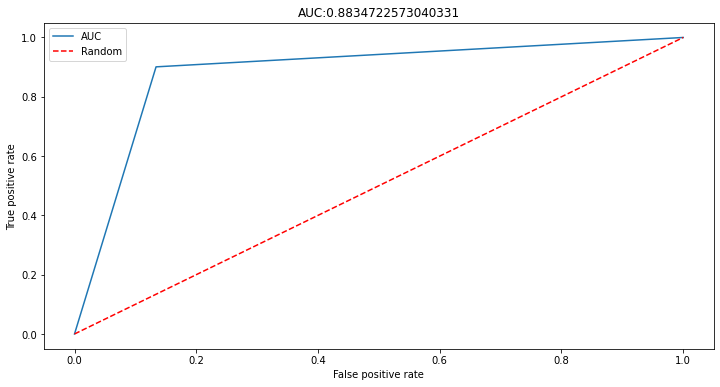

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

predictions = lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

auc = roc_auc_score(y_test, predictions)


plt.figure(figsize=(12,6))
plt.plot(fpr, tpr,label='AUC')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.title('AUC:{}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

In [87]:
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
underSample = NearMiss(0.3,random_state=1545)  # Try different ratios and compare results

In [119]:
X_resampled,y_resampled = underSample.fit_resample(X.values,y.values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [120]:
pd.Series(y_resampled).value_counts()

0    1110
1     333
dtype: int64

In [0]:
model = LogisticRegression()
model.fit(X_resampled,y_resampled)
predictions2 = model.predict(X_test)

In [122]:
print(confusion_matrix(y_test,predictions2))

[[ 953 1936]
 [  45   66]]


In [123]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.95      0.33      0.49      2889
           1       0.03      0.59      0.06       111

    accuracy                           0.34      3000
   macro avg       0.49      0.46      0.28      3000
weighted avg       0.92      0.34      0.47      3000



In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
smote = SMOTE(0.8) # Try different ratios and compare results

In [126]:
X_resampled,y_resampled = smote.fit_resample(X.values,y.values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [127]:
pd.Series(y_resampled).value_counts()


0    9667
1    7733
dtype: int64

In [0]:
model = LogisticRegression()
model.fit(X_resampled,y_resampled)
predictions3 = model.predict(X_test)

In [99]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.98      0.55      0.70      2889
           1       0.06      0.75      0.11       111

    accuracy                           0.56      3000
   macro avg       0.52      0.65      0.41      3000
weighted avg       0.95      0.56      0.68      3000



In [128]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [129]:
pd.Series(y_resampled).value_counts()

1    333
0    333
dtype: int64